### Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
# loading the diabetes dataset to a pandas DataFrame
df = pd.read_csv('loan.csv')

df

In [3]:
# printing the first 5 rows of the dataset
df.head()

,age,gender,occupation,education_level,marital_status,income,credit_score,loan_status
0,32,Male,Engineer,Bachelor's,Married,85000,720,Approved
1,45,Female,Teacher,Master's,Single,62000,680,Approved
2,28,Male,Student,High School,Single,25000,590,Denied
3,51,Female,Manager,Bachelor's,Married,105000,780,Approved
4,36,Male,Accountant,Bachelor's,Married,75000,710,Approved


In [4]:
# number of rows and Columns in this dataset
df.shape

(61, 8)

#### Perform EDA on data set

- **Numerical** - age,income,credit_score
- **Categorical** - gender, , occupation, education_level, marital_status,loan_status


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              61 non-null     int64 
 1   gender           61 non-null     object
 2   occupation       61 non-null     object
 3   education_level  61 non-null     object
 4   marital_status   61 non-null     object
 5   income           61 non-null     int64 
 6   credit_score     61 non-null     int64 
 7   loan_status      61 non-null     object
dtypes: int64(3), object(5)
memory usage: 3.9+ KB


In [6]:
# getting the statistical measures of the data
df.describe()

,age,income,credit_score
count,61.000000,61.000000,61.000000
mean,37.081967,78983.606557,709.836066
std,8.424755,33772.025802,72.674888
min,24.000000,25000.000000,560.000000
25%,30.000000,52000.000000,650.000000
50%,36.000000,78000.000000,720.000000
75%,43.000000,98000.000000,770.000000
max,55.000000,180000.000000,830.000000


### Check Outlairs on each columns

### Age columns

<Axes: >

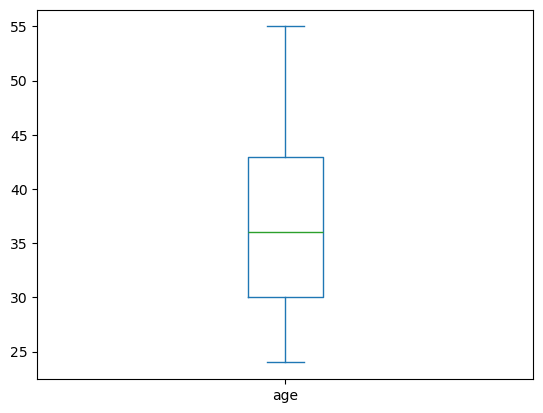

In [7]:
df['age'].plot(kind='box')

In [8]:
### Income

<Axes: >

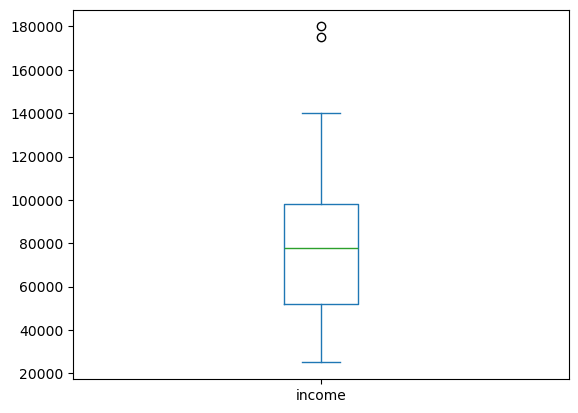

In [9]:
df['income'].plot(kind='box')


## Detect and remove the outlair

In [10]:
q1 = df['income'].quantile(0.25)
q3 = df['income'].quantile(0.75)
iqr = q3-q1

In [11]:
q1, q3, iqr

(52000.0, 98000.0, 46000.0)

In [12]:
upper_limit = q3 + (1.5 * iqr)
lower_limit = q1 - (1.5 * iqr)
lower_limit, upper_limit


(-17000.0, 167000.0)

In [13]:
# find the outliers
df.loc[(df['income'] > upper_limit) | (df['income'] < lower_limit)]

,age,gender,occupation,education_level,marital_status,income,credit_score,loan_status
9,48,Female,Doctor,Doctoral,Married,180000,820,Approved
47,48,Female,Doctor,Doctoral,Married,175000,830,Approved


In [14]:
# trimming - delete the outlier data
new_df = df.loc[(df['income'] <= upper_limit) & (df['income'] >= lower_limit)]
print('before removing outliers:', len(df))
print('after removing outliers:',len(new_df))
print('outliers:', len(df)-len(new_df))

before removing outliers: 61
after removing outliers: 59
outliers: 2


<Axes: >

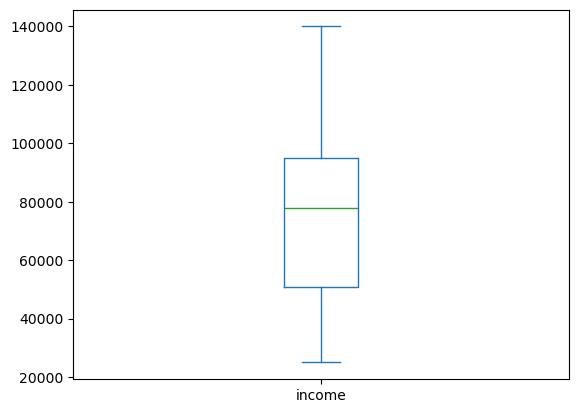

In [15]:
new_df['income'].plot(kind='box')

In [16]:
df = new_df

### Credit_score

<Axes: >

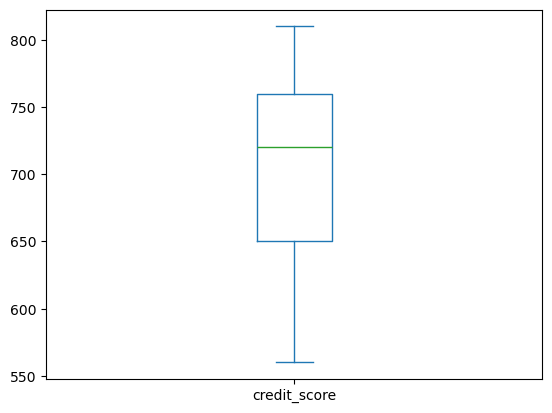

In [17]:
df['credit_score'].plot(kind='box')

### Check null values

In [18]:
df.isnull().sum()

age                0
gender             0
occupation         0
education_level    0
marital_status     0
income             0
credit_score       0
loan_status        0
dtype: int64

In [19]:
df['loan_status'].value_counts()

loan_status
Approved    43
Denied      16
Name: count, dtype: int64

### Create a Scatter Plot 

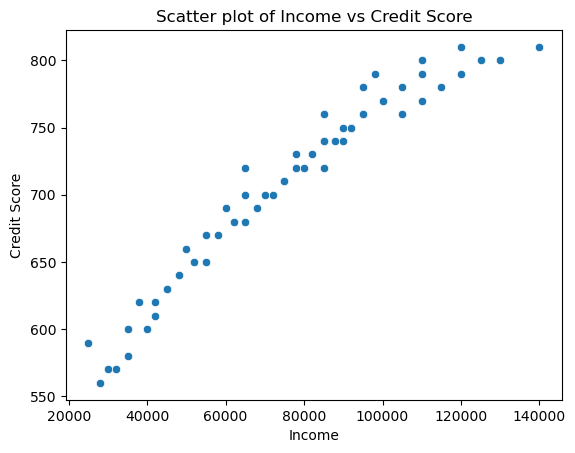

In [20]:
sns.scatterplot(x="income", y="credit_score", data=df)
plt.title('Scatter plot of Income vs Credit Score')        #this plot difine the relationship between incom and credit_score

plt.xlabel('Income')
plt.ylabel('Credit Score')
plt.show()

In [21]:
from sklearn.preprocessing import LabelEncoder  
le = LabelEncoder()
for col in ['gender','occupation','education_level','marital_status','loan_status']:
  df[col] = le.fit_transform(df[col])     

df.head(20)

,age,gender,occupation,education_level,marital_status,income,credit_score,loan_status
0,32,1,11,1,0,85000,720,0
1,45,0,34,4,1,62000,680,0
2,28,1,32,3,1,25000,590,1
3,51,0,15,1,0,105000,780,0
4,36,1,0,1,0,75000,710,0
5,24,0,18,0,1,48000,640,1
6,42,1,14,2,0,120000,790,0
7,29,0,3,1,1,38000,620,1
8,37,1,13,4,0,92000,750,0
10,55,1,6,4,0,110000,770,0


### Create a HeatMap

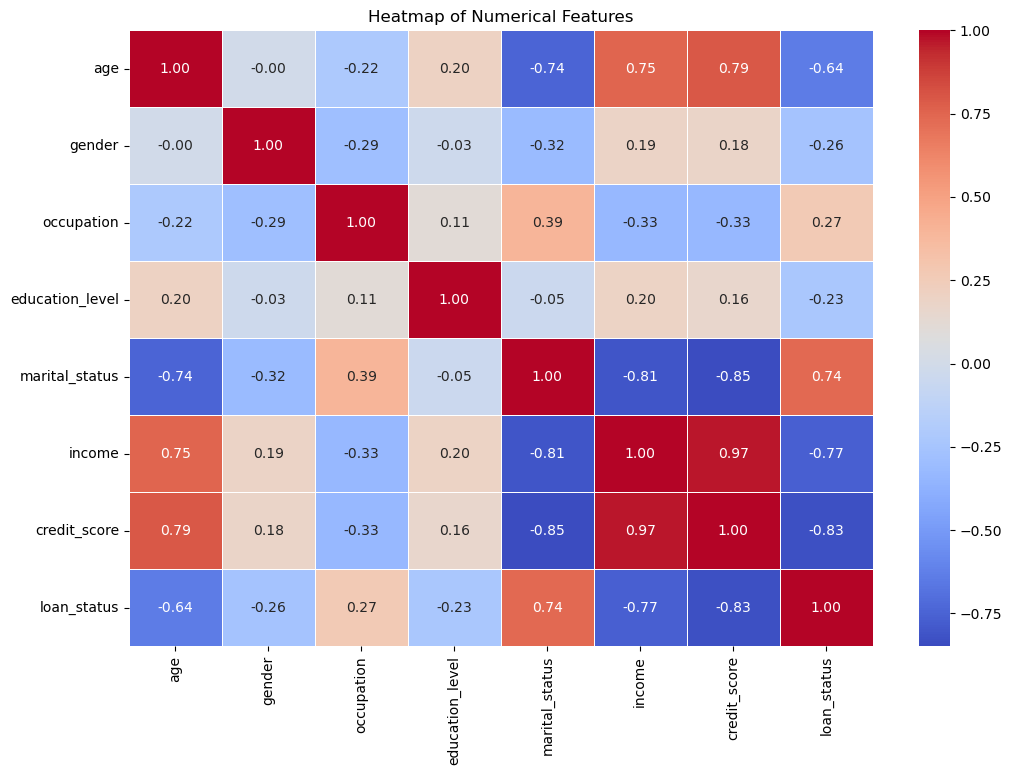

In [22]:
# Compute the correlation matrix
corr_matrix = df.corr()

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

# Set title
plt.title("Heatmap of Numerical Features")

# Show the plot
plt.show()

In [23]:
df.groupby('loan_status').mean()


,age,gender,occupation,education_level,marital_status,income,credit_score
loan_status,,,,,,,
0,39.953488,0.604651,14.55814,2.232558,0.186047,89023.255814,741.395349
1,28.000000,0.312500,21.00000,1.500000,1.000000,39687.500000,610.625000


In [24]:
# separating the data and labels
X = df.drop(columns = ['loan_status','occupation','education_level','marital_status','gender'], axis=1)
Y = df['loan_status']

In [25]:
print(X)

    age  income  credit_score
0    32   85000           720
1    45   62000           680
2    28   25000           590
3    51  105000           780
4    36   75000           710
5    24   48000           640
6    42  120000           790
7    29   38000           620
8    37   92000           750
10   55  110000           770
11   31   68000           690
12   26   42000           610
13   39   78000           730
14   44   95000           760
15   27   52000           650
16   34   88000           740
17   41  125000           800
18   30   72000           700
19   53   98000           790
20   38   80000           720
21   25   35000           580
22   46  115000           780
23   33   45000           630
24   40   60000           690
25   28   75000           710
26   35   70000           700
27   43   90000           750
28   31   55000           670
29   49   65000           720
30   27   40000           600
31   54   85000           760
32   32   95000           780
33   47  1

In [26]:
print(Y)

0     0
1     0
2     1
3     0
4     0
5     1
6     0
7     1
8     0
10    0
11    0
12    1
13    0
14    0
15    1
16    0
17    0
18    0
19    0
20    0
21    1
22    0
23    1
24    0
25    0
26    0
27    0
28    0
29    0
30    1
31    0
32    0
33    0
34    1
35    0
36    0
37    1
38    0
39    1
40    0
41    0
42    0
43    1
44    0
45    0
46    0
48    0
49    1
50    0
51    1
52    0
53    0
54    1
55    0
56    0
57    1
58    0
59    0
60    0
Name: loan_status, dtype: int32


### Data Scalling

In [27]:
scaler = StandardScaler()
scaler.fit(X)
standardized_data = scaler.transform(X)
print(standardized_data)

[[-0.57139025  0.32681952  0.2008561 ]
 [ 1.00507134 -0.47661179 -0.37025281]
 [-1.05645535 -1.76908825 -1.65524784]
 [ 1.73266899  1.02545544  1.05751945]
 [-0.08632515 -0.02249844  0.05807887]
 [-1.54152045 -0.96565694 -0.94136171]
 [ 0.64127251  1.54943238  1.20029668]
 [-0.93518907 -1.3149749  -1.22691616]
 [ 0.03494113  0.57134209  0.62918777]
 [ 2.21773409  1.20011442  0.91474222]
 [-0.69265652 -0.26702102 -0.22747558]
 [-1.2989879  -1.17524771 -1.36969338]
 [ 0.27747368  0.08229694  0.34363332]
 [ 0.88380506  0.67613748  0.771965  ]
 [-1.17772163 -0.82592975 -0.79858448]
 [-0.3288577   0.4316149   0.48641055]
 [ 0.52000623  1.72409136  1.3430739 ]
 [-0.8139228  -0.12729383 -0.08469835]
 [ 1.97520154  0.78093286  1.20029668]
 [ 0.15620741  0.15216054  0.2008561 ]
 [-1.42025418 -1.41977029 -1.79802506]
 [ 1.12633761  1.3747734   1.05751945]
 [-0.45012397 -1.07045233 -1.08413893]
 [ 0.39873996 -0.54647539 -0.22747558]
 [-1.05645535 -0.02249844  0.05807887]
 [-0.20759142 -0.19715743

In [28]:
X = standardized_data
Y = df['loan_status']

In [29]:
print(X)
print(Y)

[[-0.57139025  0.32681952  0.2008561 ]
 [ 1.00507134 -0.47661179 -0.37025281]
 [-1.05645535 -1.76908825 -1.65524784]
 [ 1.73266899  1.02545544  1.05751945]
 [-0.08632515 -0.02249844  0.05807887]
 [-1.54152045 -0.96565694 -0.94136171]
 [ 0.64127251  1.54943238  1.20029668]
 [-0.93518907 -1.3149749  -1.22691616]
 [ 0.03494113  0.57134209  0.62918777]
 [ 2.21773409  1.20011442  0.91474222]
 [-0.69265652 -0.26702102 -0.22747558]
 [-1.2989879  -1.17524771 -1.36969338]
 [ 0.27747368  0.08229694  0.34363332]
 [ 0.88380506  0.67613748  0.771965  ]
 [-1.17772163 -0.82592975 -0.79858448]
 [-0.3288577   0.4316149   0.48641055]
 [ 0.52000623  1.72409136  1.3430739 ]
 [-0.8139228  -0.12729383 -0.08469835]
 [ 1.97520154  0.78093286  1.20029668]
 [ 0.15620741  0.15216054  0.2008561 ]
 [-1.42025418 -1.41977029 -1.79802506]
 [ 1.12633761  1.3747734   1.05751945]
 [-0.45012397 -1.07045233 -1.08413893]
 [ 0.39873996 -0.54647539 -0.22747558]
 [-1.05645535 -0.02249844  0.05807887]
 [-0.20759142 -0.19715743

### Train Test Split

In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2,  random_state=2)

In [31]:
print(X.shape, X_train.shape, X_test.shape)

(59, 3) (47, 3) (12, 3)


## Training the Model

### RandomForestClassifier

In [32]:
from sklearn.ensemble import RandomForestClassifier
Random_forest= RandomForestClassifier(random_state=42)
Random_forest.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

Model Evaluation

Accuracy Score

In [33]:
# accuracy score on the training data
X_train_prediction = Random_forest.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [34]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  1.0


In [35]:
# accuracy score on the test data
X_test_prediction = Random_forest.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [36]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  1.0


#### Loan approved & denied
##### 1 = denied
##### 0 = approved

Making a Predictive System

In [37]:
input_data = (28,	200000,	900)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = Random_forest.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('approved')
else:
  print('denied')

[[-1.05645535  4.34397606  2.77084616]]
[0]
approved


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [38]:
input_data = (42	,	10000,	650)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = Random_forest.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('approved')
else:
  print('denied')

[[ 0.64127251 -2.29306519 -0.79858448]]
[1]
denied


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


### Logistic_regression

In [39]:
from sklearn.linear_model import LogisticRegression
logistic_regression = LogisticRegression(random_state=30)
logistic_regression.fit(X_train, Y_train)

LogisticRegression(random_state=30)

##### find the accucacy score of training data and testing data

In [40]:
X_train_prediction = logistic_regression.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print("accuracy score of the training data is ", training_data_accuracy)

X_test_prediction = logistic_regression.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print("accuracy score of the test data is ", test_data_accuracy)


accuracy score of the training data is  0.9787234042553191
accuracy score of the test data is  1.0


### DecisionTreeClassifier 

In [41]:
from sklearn.tree import DecisionTreeClassifier
decision_classifier = DecisionTreeClassifier(random_state=30)
decision_classifier.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=30)

##### find the accucacy score of training data and testing data

In [42]:
X_train_prediction = decision_classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print("accuracy score of the training data is ", training_data_accuracy)

X_test_prediction = decision_classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print("accuracy score of the test data is ", test_data_accuracy)

accuracy score of the training data is  1.0
accuracy score of the test data is  1.0


### KNeighborsClassifier

In [43]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=3)

##### find the accucacy score of training data and testing data

In [44]:
X_train_prediction = knn_classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print("accuracy score of the training data is ", training_data_accuracy)

X_test_prediction = knn_classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print("accuracy score of the test data is ", test_data_accuracy)

accuracy score of the training data is  1.0
accuracy score of the test data is  1.0


### support vactor machine

In [45]:
from sklearn.svm import SVC
svc = SVC(random_state=42)
svc.fit(X_train, Y_train)

SVC(random_state=42)

##### find the accucacy score of training data and testing data

In [46]:
X_train_prediction = svc.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print("accuracy score of the training data is ", training_data_accuracy)

X_test_prediction = svc.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print("accuracy score of the test data is ", test_data_accuracy)

accuracy score of the training data is  0.9787234042553191
accuracy score of the test data is  1.0


### Naive_bayes

In [47]:
from sklearn.naive_bayes import GaussianNB
N_bayes = GaussianNB()
N_bayes .fit(X_train, Y_train)

GaussianNB()

##### find the accucacy score of training data and testing data

In [48]:
X_train_prediction = N_bayes.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print("accuracy score of the training data is ", training_data_accuracy)

X_test_prediction = N_bayes.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print("accuracy score of the test data is ", test_data_accuracy)

accuracy score of the training data is  0.9361702127659575
accuracy score of the test data is  1.0


In [49]:
import pickle

In [50]:
pickle.dump(Random_forest,open('Loan_R_F_model.pkl','wb'))
